In [1]:
import pandas as pd
from plotnine import *
import plotnine as p9
import re

In [2]:
expe_dt = [336,386,408,481,506,646]
expe_dt = [x/24. for x in expe_dt]
expe_diam = [ 1140 , 1400 , 1590 , 2040 , 2250 , 3040 ]

biodynamo_dt = [14, 14.8333333333333, 15.6666666666667, 16.5, 17.3333333333333, 18.1666666666666, 18.9999999999999, 19.8333333333332, 20.6666666666665, 21.4999999999998, 22.333333333333, 23.1666666666663, 23.9999999999996, 24.8333333333329, 25.6666666666665, 26.5]
biodynamo_diam =  [1240, 1320, 1440, 1560, 1680, 1800, 1920, 2040, 2160, 2280, 2400, 2520, 2640, 2760, 2880, 3000]

df_tsim_pre = pd.read_csv('../Tisim/use_case_2Ddisk/results/result_2d_10_8_3.9_50.txt',sep='\t',engine='python')
df_tsim_pre


,time [d],Time [s],numCells (population 0),numCells (all),Radius of Gyration [μm],Radius of cell population [μm],min Cell cycle time [s],max Cell cycle time [s],mean Cell cycle time [s],min Absolute force (population 0) [nN],max Absolute force (population 0) [nN],mean Absolute force (population 0) [nN],Unnamed: 12
0,0.0,0.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
1,0.1,8648.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
2,0.2,17288.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
3,0.3,25928.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
4,0.4,34568.0,1,1,0.00,0.00,73246.4,73246.4,73246.4,0.00000,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,25.5,2203200.0,142887,142887,1017.68,1439.22,34451.5,90942.6,63059.0,15.18030,2063.96,1020.96,NaN
256,25.6,2211840.0,144427,144427,1023.12,1446.91,34451.5,90942.6,63054.2,32.69070,2122.76,1021.23,NaN
257,25.7,2220480.0,145974,145974,1028.56,1454.60,35108.0,90942.6,63050.5,16.25990,2130.06,1021.69,NaN
258,25.8,2229120.0,147588,147588,1034.17,1462.54,35108.0,90942.6,63052.7,26.32780,2116.23,1022.19,NaN


In [13]:
tisim_diam = [2*x for x in df_tsim_pre["Radius of cell population [μm]"].iloc[142:]]
tisim_dt = [x/86400 for x in df_tsim_pre['Time [s]'].iloc[142:]]
with open("../Chaste/use_case_2Ddisk/results/multiple-cells/tissuewidth.dat") as results_file:
    times = []
    tissue_widths = []
    for line in results_file:
        line = line.replace('\n', '')
        values = re.split('\t|,', line)
        if len(values) == 1:
            continue
        
        times.append(float(values[0]))
        tissue_widths.append(float(values[3]))
df_chaste = pd.DataFrame(data = zip(times,tissue_widths),columns=['dt','diam'])


In [14]:
df_chaste


,dt,diam
0,0.0,1130.00
1,0.5,1139.84
2,1.0,1145.22
3,1.5,1149.32
4,2.0,1152.75
...,...,...
336,168.0,2062.29
337,168.5,2064.07
338,169.0,2065.52
339,169.5,2066.99


In [ ]:
df_chaste["dt"]=(df_chaste["dt"]+336)/24
df_pc = pd.read_csv('../Physicell/output/physicell1428.csv' ,sep=',',engine='python')
df_pc = df_pc.drop(columns=df_pc.columns[0])

In [4]:
df_chaste



,dt,diam
0,14.000000,1130.00
1,14.020833,1139.84
2,14.041667,1145.22
3,14.062500,1149.32
4,14.083333,1152.75
...,...,...
336,21.000000,2062.29
337,21.020833,2064.07
338,21.041667,2065.52
339,21.062500,2066.99


In [5]:
df_exp = pd.DataFrame(data=zip(expe_dt,expe_diam),columns=['dt','diam'])
df_exp.insert(loc=2, column='Results', value='Experimental')
df_biod = pd.DataFrame(data=zip(biodynamo_dt,biodynamo_diam),columns=['dt','diam'])
df_biod.insert(loc=2, column='Results', value='BioDynaMo')
df_tisim = pd.DataFrame(data=zip(tisim_dt,tisim_diam),columns=['dt','diam'])
df_tisim.insert(loc=2, column='Results', value='TiSim')
df_pc.insert(loc=2, column='Results', value='PhysiCell')
df_chaste.insert(loc=2,column='Results',value="Chaste")

In [6]:
frames = [df_pc, df_tisim, df_biod, df_exp,df_chaste]
df_all = pd.concat(frames)

color = {
    'Experimental': 'black', 
    'BioDynaMo': 'red', 
    'TiSim': 'orange',
    'PhysiCell': 'green',
    'Chaste': 'blue'
    }

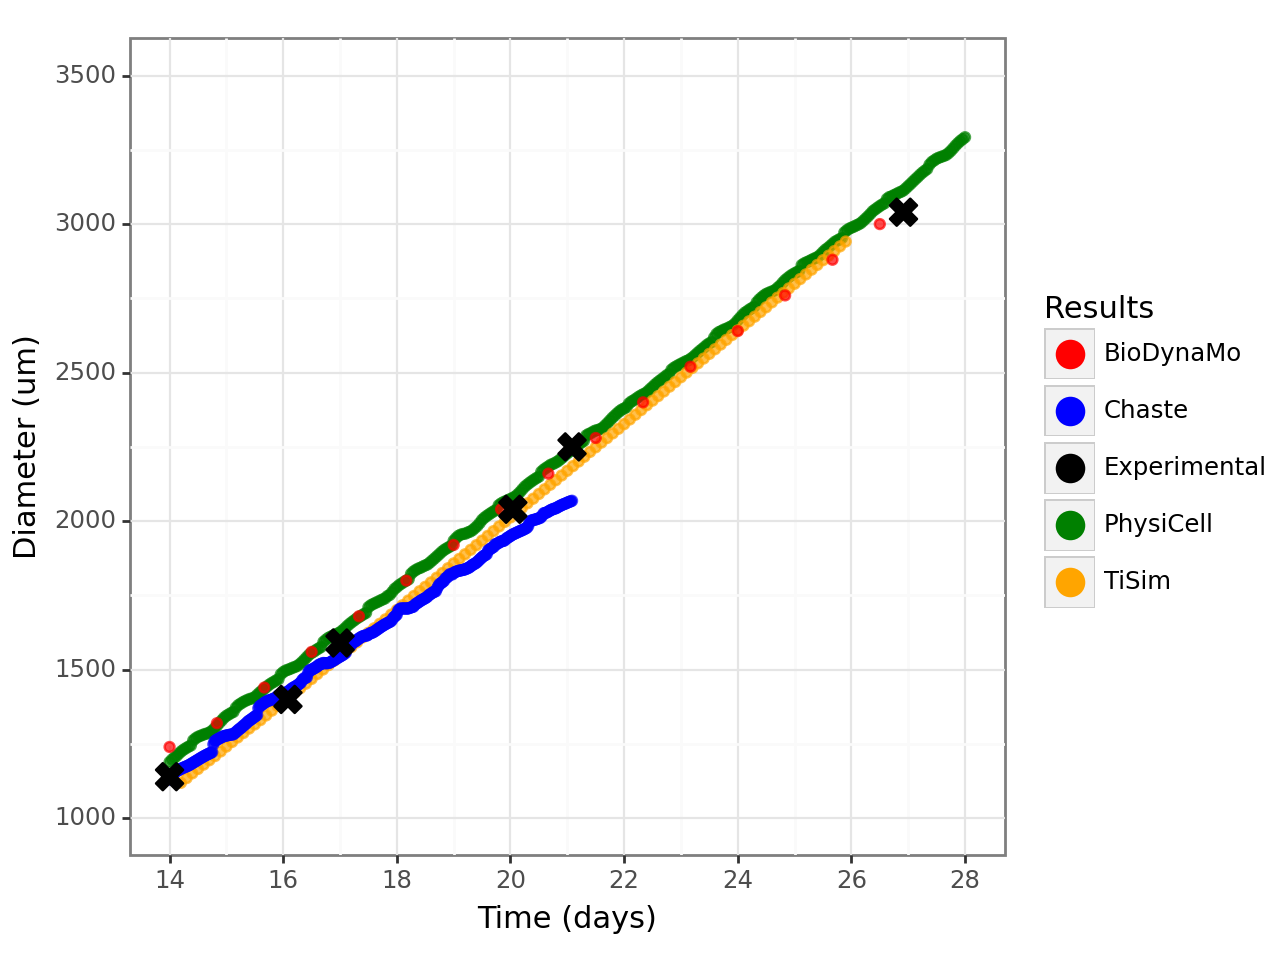

<Figure Size: (640 x 480)>

In [7]:
(
    ggplot (df_all) + 
    aes(x='dt',y='diam', colour='Results') + 
    geom_point(alpha = 0.7) +
    geom_point(data=df_all.query("Results == 'Experimental' "), shape="X", size=5)+
    scale_color_manual(values=color, name="Results")+
    scale_x_continuous(name="Time (days)", limits={14, 28}, breaks = range(14,30,2))+
    scale_y_continuous(name="Diameter (um)", limits={1000, 3500}, breaks = range(0,4000,500))+
    theme_bw()+
    theme(legend_position = "right")+
    guides(colour=guide_legend(override_aes={"shape": 'o'}))
)

In [8]:
monolayer = ggplot (df_all) + \
aes(x='dt',y='diam', colour='Results') + \
geom_point(alpha = 0.7) + \
geom_point(data=df_all.query("Results == 'Experimental' "), shape="X", size=5)+ \
scale_color_manual(values=color, name="Results")+\
scale_x_continuous(name="Time (days)", limits={14, 28}, breaks = range(14,30,2))+\
scale_y_continuous(name="Diameter (um)", limits={1000, 3500}, breaks = range(0,4000,500))+\
theme_bw()+\
theme(legend_position = "right")+\
guides(colour=guide_legend(override_aes={"shape": 'o'}))

monolayer.save(filename = 'monolayer.png', height=5, width=9, units = 'in', dpi=1000)

/home/thalia/.local/lib/python3.10/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 9 x 5 in image.
/home/thalia/.local/lib/python3.10/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: monolayer.png
